In [15]:
import utils
import numpy as np
import matplotlib.pyplot as plt
from xcorr import xcorr
from ipywidgets import widgets
from IPython.display import Audio
from scipy.io.wavfile import read
from ipywidgets import interact

In [2]:
def get_timeAxis(fs, sin):
    n = np.arange(len(sin))
    return n/fs

In [3]:
def niceplot():
    plt.margins(x=0)
    plt.grid()

In [4]:
def autocorrelation(sig, width, step, fs):
    step_len = int(fs*step/1000)
    sig = utils.normalize(sig)
    frames = utils.split(sig, width, step, fs)
    pitch = []
    energy = []

    for f in frames:
        lags, corr = xcorr(f, maxlag=fs//50)
        distance = utils.get_distance(lags, corr)
        pitch += [fs/distance if distance != -1 else -1]*step_len
        energy += [utils.energy(f)]*step_len

    return np.array(pitch), np.array(energy)

In [5]:
fs, sentence = read('cmu_us_bdl_arctic/wav/arctic_a0001.wav')
t = get_timeAxis(fs, sentence)

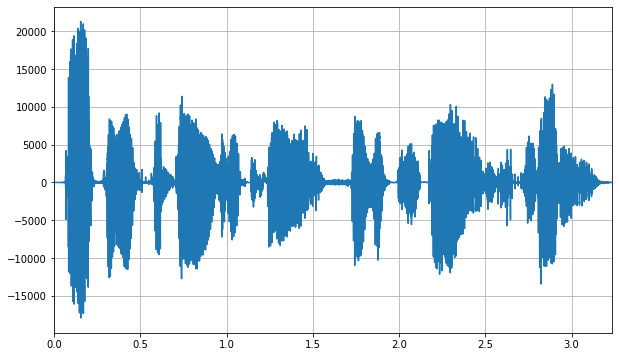

In [6]:
plt.figure(figsize=(10,6))
plt.plot(t, sentence)
niceplot()

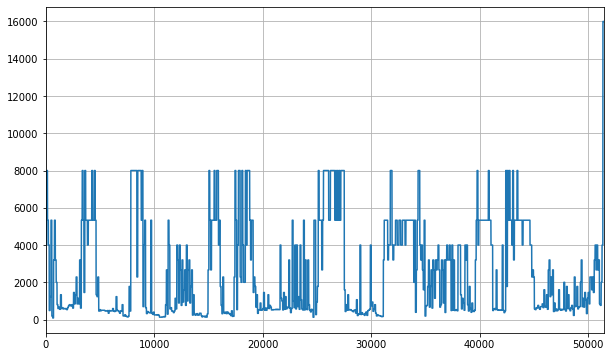

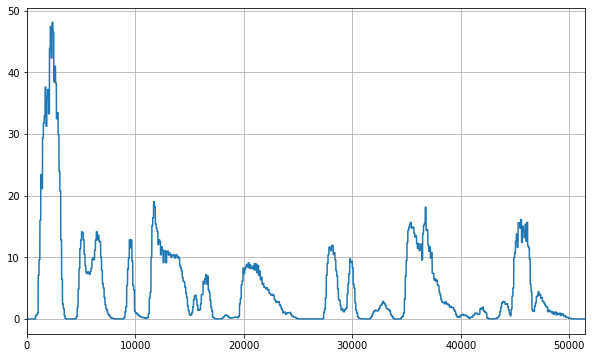

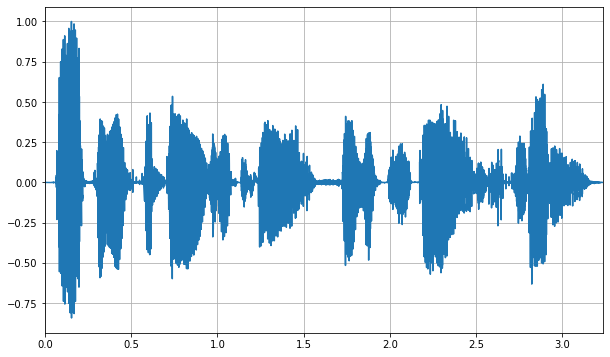

In [12]:
pitch, energy = autocorrelation(sentence, 21, 5, fs)

plt.figure(figsize=(10,6))
plt.plot(pitch)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(energy)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(t, utils.normalize(sentence))
niceplot()

In [23]:
def test_threshold(t):
    freq = [f if e >= t else 0 for f,e in zip(pitch, energy)]
    
    plt.figure(figsize=(10,6))
    plt.axhline(t)
    plt.plot(energy)
    niceplot()

    plt.figure(figsize=(10,6))
    plt.plot(freq)
    niceplot()
    
    
interact(test_threshold, t=(0, 50, 0.5), continuous_update=False)

interactive(children=(FloatSlider(value=25.0, description='t', max=50.0, step=0.5), Output()), _dom_classes=('…

<function __main__.test_threshold(t)>